In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 
%matplotlib inline

In [2]:
train_dir = "Training"
test_dir ="Test"
CATEGORIES = ["male","female"]

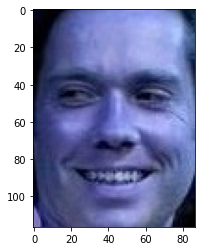

In [3]:
for category in CATEGORIES:
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [4]:
img_array.shape

(117, 87, 3)

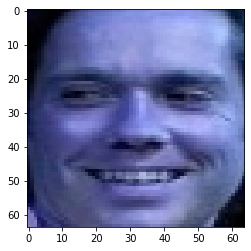

In [5]:
IMG_SIZE= (64)

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [6]:
new_array.shape

(64, 64, 3)

In [7]:
train_data = []
test_data = []

def get_data(directory, list_dir):
    for category in CATEGORIES:
        path = os.path.join(directory, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
                list_dir.append([new_array, class_num])
            except Exception as e:
                pass
get_data(train_dir,train_data)
get_data(test_dir,test_data)

In [8]:
len(train_data), len(test_data)

(47009, 11649)

In [9]:
import random
import numpy as np
random.shuffle(train_data)
random.shuffle(test_data)

In [10]:
X_train = []
y_train = []
X_test = []
y_test = []

def split_train_test(data, img, labels):
    for i in data:
        img.append(i[0])
        labels.append(i[1])
                          
split_train_test(train_data, X_train,y_train)
split_train_test(test_data, X_test,y_test)

In [11]:
X_train = np.array(X_train).reshape(-1,IMG_SIZE, IMG_SIZE,3)
X_test= np.array(X_test).reshape(-1,IMG_SIZE, IMG_SIZE,3)


y_train = np.array(y_train)
y_test = np.array(y_test)

In [12]:
X_train.shape

(47009, 64, 64, 3)

In [13]:
from sklearn.model_selection import train_test_split

X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size=0.5)

In [14]:
X_test.shape

(5825, 64, 64, 3)

In [15]:
X_val.shape

(5824, 64, 64, 3)

In [16]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
vgg16_model = VGG16(weights="imagenet", include_top=False, input_shape=(64,64,3))
vgg16_model.trainable = False ## Not trainable weights

In [17]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [18]:
model=tf.keras.models.Sequential([vgg16_model,
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(2048,activation='relu'), 
                             tf.keras.layers.Dropout(0.1),
                             tf.keras.layers.Dense(128,activation='relu'), 
                             tf.keras.layers.Dropout(0.1),
                             tf.keras.layers.Dense(16,activation='LeakyReLU'),
                             tf.keras.layers.Dropout(0.1),
                             tf.keras.layers.Dense(1,activation='sigmoid')
                              ])

In [44]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val,y_val))  

Epoch 1/20
1470/1470 [==============================] - 76s 51ms/step - loss: 0.1848 - accuracy: 0.9295 - val_loss: 0.2265 - val_accuracy: 0.9245
Epoch 2/20
1470/1470 [==============================] - 75s 51ms/step - loss: 0.1619 - accuracy: 0.9380 - val_loss: 0.2082 - val_accuracy: 0.9208
Epoch 3/20
1470/1470 [==============================] - 75s 51ms/step - loss: 0.1407 - accuracy: 0.9459 - val_loss: 0.2314 - val_accuracy: 0.9236
Epoch 4/20
1470/1470 [==============================] - 76s 52ms/step - loss: 0.1255 - accuracy: 0.9532 - val_loss: 0.2326 - val_accuracy: 0.9212
Epoch 5/20
1470/1470 [==============================] - 75s 51ms/step - loss: 0.1129 - accuracy: 0.9583 - val_loss: 0.2709 - val_accuracy: 0.9217
Epoch 6/20
1470/1470 [==============================] - 74s 51ms/step - loss: 0.1000 - accuracy: 0.9629 - val_loss: 0.2338 - val_accuracy: 0.9262
Epoch 7/20
1470/1470 [==============================] - 75s 51ms/step - loss: 0.0897 - accuracy: 0.9670 - val_loss: 0.3224 -

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [47]:
model.evaluate(X_test,y_test)

183/183 [==============================] - 6s 30ms/step - loss: 0.4200 - accuracy: 0.9185


[0.42003390192985535, 0.9184549450874329]

In [48]:
predictions = model.predict(X_test)
predictions[:5]

183/183 [==============================] - 5s 29ms/step


array([[1.5106936e-01],
       [9.9994433e-01],
       [1.9364970e-12],
       [1.1396179e-12],
       [9.9999845e-01]], dtype=float32)

In [49]:
predicted = []
for i in predictions:
    if i>0.5:
        predicted.append(1)
    else:
        predicted.append(0)
        
predicted[:5]

[0, 1, 0, 0, 1]

In [50]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted)

Text(69.0, 0.5, 'Truth')

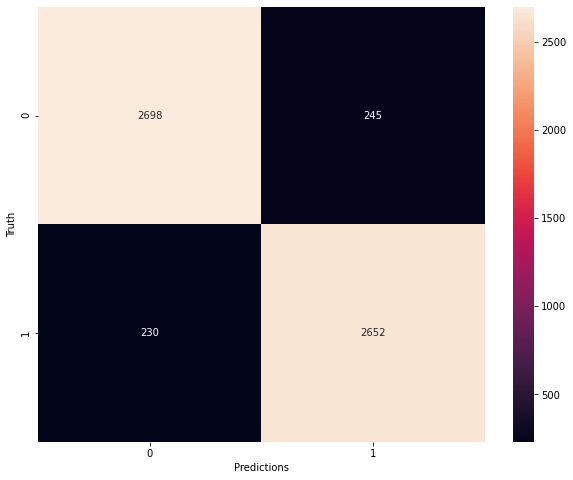

In [51]:
import seaborn as sn

plt.figure(figsize=(10,8))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [26]:
import mtcnn
from mtcnn import MTCNN
from matplotlib import pyplot 
from PIL import Image
from numpy import asarray

In [29]:
def getface(filename):
    # read image as numpy array
    pixels = pyplot.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize((64,64))
    face_array = asarray(image)
    pyplot.imshow(face_array)
    return face_array

1/1 [==============================] - 0s 173ms/step


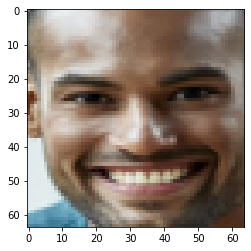

In [43]:
a=getface('1.jpg')

In [63]:

print(a.shape)

(64, 64, 3)


In [65]:
model.predict(a.reshape(1,64,64,3))

1/1 [==============================] - 0s 17ms/step


array([[4.1852535e-09]], dtype=float32)

In [ ]:
for i in range(1,9):
    img=str(i)+'.jpg'
    crop_img=getface(img)
    print(crop_img.shape)
    pred=model.predict(crop_img.reshape(1,64,64,3))
    pyplot.imshow(crop_img)
    pyplot.show()
    if pred>0.5:
        print('female')
    else:
        print('male')
        

In [17]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [18]:
resnet_model=ResNet50(weights="imagenet", include_top=False, input_shape=(64,64,3))

In [19]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 16, 16, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 16, 16, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 16, 16, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 8, 8, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 8, 8, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 4, 4, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 4, 4, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 4, 4, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block2_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 4, 4, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 4, 4, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 2, 2, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 2, 2, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 2, 2, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_blo

In [20]:
for layer in resnet_model.layers[:165]:
    layer.trainable=False
for i,layer in enumerate(resnet_model.layers):
    print(i,layer.name,layer.trainable)

0 input_2 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [21]:
res_model_new=tf.keras.models.Sequential([resnet_model,
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(2048,activation='relu'), 
                             tf.keras.layers.Dropout(0.1),
                             tf.keras.layers.Dense(128,activation='relu'), 
                             tf.keras.layers.Dropout(0.1),
                             tf.keras.layers.Dense(16,activation='LeakyReLU'),
                             tf.keras.layers.Dropout(0.1),
                             tf.keras.layers.Dense(1,activation='sigmoid')
                              ])

In [22]:
res_model_new.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = res_model_new.fit(X_train, y_train, epochs=20, validation_data=(X_val,y_val))  

Epoch 1/20
1470/1470 [==============================] - 129s 79ms/step - loss: 0.2873 - accuracy: 0.8965 - val_loss: 0.1740 - val_accuracy: 0.9303
Epoch 2/20
1470/1470 [==============================] - 114s 78ms/step - loss: 0.1834 - accuracy: 0.9330 - val_loss: 0.1943 - val_accuracy: 0.9354
Epoch 3/20
1470/1470 [==============================] - 111s 76ms/step - loss: 0.1598 - accuracy: 0.9421 - val_loss: 0.1535 - val_accuracy: 0.9387
Epoch 4/20
1470/1470 [==============================] - 116s 79ms/step - loss: 0.1305 - accuracy: 0.9535 - val_loss: 0.1815 - val_accuracy: 0.9298
Epoch 5/20
1470/1470 [==============================] - 114s 78ms/step - loss: 0.1101 - accuracy: 0.9611 - val_loss: 0.1753 - val_accuracy: 0.9397
Epoch 6/20
1470/1470 [==============================] - 101s 69ms/step - loss: 0.0836 - accuracy: 0.9699 - val_loss: 0.2077 - val_accuracy: 0.9341
Epoch 7/20
1470/1470 [==============================] - 63s 43ms/step - loss: 0.0668 - accuracy: 0.9763 - val_loss: 0.

In [24]:
res_model_new.evaluate(X_test,y_test)

183/183 [==============================] - 6s 26ms/step - loss: 0.5216 - accuracy: 0.9317


[0.5215897560119629, 0.9316738247871399]

1/1 [==============================] - 0s 89ms/step


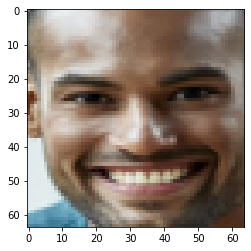

(64, 64, 3)
1/1 [==============================] - 0s 20ms/step
male
1/1 [==============================] - 0s 105ms/step


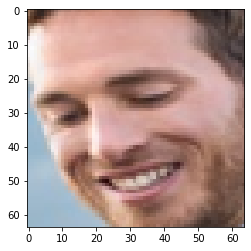

(64, 64, 3)
1/1 [==============================] - 0s 24ms/step
male
1/1 [==============================] - 0s 93ms/step


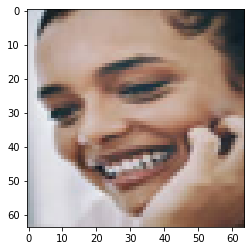

(64, 64, 3)
1/1 [==============================] - 0s 24ms/step
male
1/1 [==============================] - 0s 95ms/step


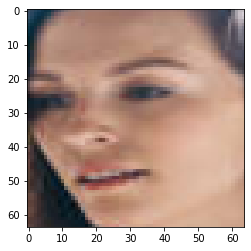

(64, 64, 3)
1/1 [==============================] - 0s 22ms/step
female
1/1 [==============================] - 0s 101ms/step


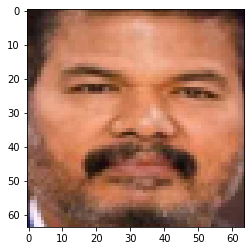

(64, 64, 3)
1/1 [==============================] - 0s 20ms/step
male
1/1 [==============================] - 0s 107ms/step


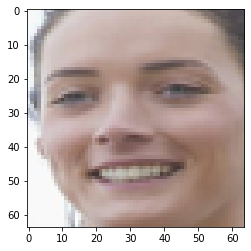

(64, 64, 3)
1/1 [==============================] - 0s 21ms/step
male
1/1 [==============================] - 0s 97ms/step


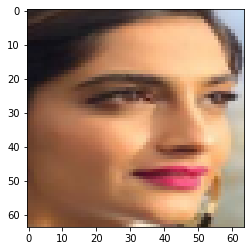

(64, 64, 3)
1/1 [==============================] - 0s 23ms/step
female


In [37]:
pyplot.rc('text', color='a8151a')
for i in range(1,8):
    img=str(i)+'.jpg'
    crop_img=getface(img)
    pyplot.imshow(crop_img)
    pyplot.show()
    print(crop_img.shape)
    pred=res_model_new.predict(crop_img.reshape(1,64,64,3))
    if pred>0.5:
        print('female')
    else:
        print('male')
        